# Group Members
1. Mbeleck Berle
2. Idowu Aladesiun
3. Eniola Adebanjo

## __Dataset Description__

#### This is the data set used for The Third International Knowledge Discovery and Data Mining Tools Competition, which was held in conjunction with KDD-99 The Fifth International Conference on Knowledge Discovery and Data Mining. The competition task was to build a network intrusion detector, a predictive model capable of distinguishing between ``"bad"`` connections, called intrusions or attacks, and ``"good"`` normal connections. This database contains a standard set of data to be audited, which includes a wide variety of intrusions simulated in a military network environment.

The standard format of KDD99 does not include column names. Because of that, there was prior preprocessing to add the column names

link: https://kdd.ics.uci.edu/databases/kddcup99/kddcup99.html

## __Imports__

In [1]:
import pandas as pd
from tensorflow.keras.utils import get_file
from sklearn import metrics
import numpy as np
import pandas as pd
from IPython.display import display, HTML 
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

2024-07-30 18:16:30.991421: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-07-30 18:16:31.119458: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-30 18:16:31.169427: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-30 18:16:31.184742: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-30 18:16:31.276171: I tensorflow/core/platform/cpu_feature_guar

# __1.  Data Preprocessing and Exploration__

## 1.1 Loading the data and previewing

In [2]:
# (train_ds, test_ds), info = tfds.load('kddcup99', split=['train','test'], shuffle_files=True,with_info=True)
# train_df = tfds.as_dataframe(train_ds.take(3000), info)
# test_df = tfds.as_dataframe(test_ds.take(1000), info)

pd.set_option('display.max_columns', 6)
pd.set_option('display.max_rows', 5)

try:
    path = get_file('kdd-with-columns.csv', origin='http://kdd.ics.uci.edu/databases/kddcup99/kddcup.data_10_percent.gz')
except:
    print('Error downloading')
    raise
    
print(path) 

df = pd.read_csv(path)
df_copy= df
df_copy['labels'] = df_copy['outcome'].apply(lambda x: True if x == 'normal' else False)

print("Read {} rows.".format(len(df)))
# df = df.sample(frac=0.1, replace=False) # Uncomment this line to 
# sample only 10% of the dataset
df.dropna(inplace=True,axis=1) 
# For now, just drop NA's (rows with missing values)

pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_rows', None)  # Show all rows
# display 5 rows
df.head(10)

/home/mojo/.keras/datasets/kdd-with-columns.csv
Read 494021 rows.


duration protocol_type service flag  src_bytes  dst_bytes  land  \
0         0           tcp    http   SF        181       5450     0   
1         0           tcp    http   SF        239        486     0   
2         0           tcp    http   SF        235       1337     0   
3         0           tcp    http   SF        219       1337     0   
4         0           tcp    http   SF        217       2032     0   
5         0           tcp    http   SF        217       2032     0   
6         0           tcp    http   SF        212       1940     0   
7         0           tcp    http   SF        159       4087     0   
8         0           tcp    http   SF        210        151     0   
9         0           tcp    http   SF        212        786     0   

   wrong_fragment  urgent  hot  num_failed_logins  logged_in  num_compromised  \
0               0       0    0                  0          1                0   
1               0       0    0                  0          1                0   
2               0       0    0                  0          1                0   
3               0       0    0                  0          1                0   
4               0       0    0                  0          1                0   
5               0       0    0                  0          1                0   
6               0       0    0                  0          1                0   
7               0       0    0                  0          1                0   
8               0       0    0                  0          1                0   
9               0       0    1                  0          1                0   

   root_shell  su_attempted  num_root  num_file_creations  num_shells  \
0           0             0         0                   0           0   
1           0             0         0                   0           0   
2           0             0         0                   0           0   
3           0             0         0                   0           0   
4           0             0         0                   0           0   
5           0             0         0                   0           0   
6           0             0         0                   0           0   
7           0             0         0                   0           0   
8           0             0         0                   0           0   
9           0             0         0                   0           0   

   num_access_files  num_outbound_cmds  is_host_login  is_guest_login  count  \
0                 0                  0              0               0      8   
1                 0                  0              0               0      8   
2                 0                  0              0               0      8   
3                 0                  0              0               0      6   
4                 0                  0              0               0      6   
5                 0                  0              0               0      6   
6                 0                  0              0               0      1   
7                 0                  0              0               0      5   
8                 0                  0              0               0      8   
9                 0                  0              0               0      8   

   srv_count  serror_rate  srv_serror_rate  rerror_rate  srv_rerror_rate  \
0          8          0.0              0.0          0.0              0.0   
1          8          0.0              0.0          0.0              0.0   
2          8          0.0              0.0          0.0              0.0   
3          6          0.0              0.0          0.0              0.0   
4          6          0.0              0.0          0.0              0.0   
5          6          0.0              0.0          0.0              0.0   
6          2          0.0              0.0          0.0              0.0   
7          5          0.0              0.0     

### The outcomes contains <text style="color: red">**Attack behavioiur**</text> and  <text style="color: lightgreen"> **Normal behaviour** </text>.<br>
### we are interested in the <text style="color: lightgreen"> **Normal behaviour** </text>


In [3]:
# df.groupby('outcome')['outcome'].count()
# print(df['outcome'].value_counts())
print(df['outcome'].unique())

['normal.' 'buffer_overflow.' 'loadmodule.' 'perl.' 'neptune.' 'smurf.'
 'guess_passwd.' 'pod.' 'teardrop.' 'portsweep.' 'ipsweep.' 'land.'
 'ftp_write.' 'back.' 'imap.' 'satan.' 'phf.' 'nmap.' 'multihop.'
 'warezmaster.' 'warezclient.' 'spy.' 'rootkit.']


In [4]:
len(df)

494021

## __1.2 Encoding__
### The first function converts numeric columns into Z-Scores. The second function replaces categorical values with dummy variables.

In [5]:
# Encode a numeric column as zscores
def encode_numeric_zscore(df, name, mean=None, sd=None):
    if mean is None:
        mean = df[name].mean()

    if sd is None:
        sd = df[name].std()

    df[name] = (df[name] - mean) / sd
    
# Encode text values to dummy variables

def encode_text_dummy(df, name):
    dummies = pd.get_dummies(df[name])
    for x in dummies.columns:
        dummy_name = f"{name}-{x}"
        df[dummy_name] = dummies[x]
    df.drop(name, axis=1, inplace=True)

    

In [6]:
df.dtypes.unique()

array([dtype('int64'), dtype('O'), dtype('float64'), dtype('bool')],
      dtype=object)

In [7]:
# encode the feature vector (inputs)
pd.set_option('display.max_columns', 6)
pd.set_option('display.max_rows', 5)

for name in df.columns:
  if name == 'outcome':
    pass
  elif name in ['protocol_type','service','flag','land','logged_in',
                'is_host_login','is_guest_login']:
    encode_text_dummy(df,name)
  else:
    encode_numeric_zscore(df,name)    

# display 5 rows
df.dropna(inplace=True,axis=1)
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_rows', None)  # Show all rows
df.head(10)

/tmp/ipykernel_14333/1022962645.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[dummy_name] = dummies[x]
/tmp/ipykernel_14333/1022962645.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[dummy_name] = dummies[x]
/tmp/ipykernel_14333/1022962645.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.

duration  src_bytes  dst_bytes  wrong_fragment    urgent       hot  \
0 -0.067792  -0.002879   0.138664        -0.04772 -0.002571 -0.044136   
1 -0.067792  -0.002820  -0.011578        -0.04772 -0.002571 -0.044136   
2 -0.067792  -0.002824   0.014179        -0.04772 -0.002571 -0.044136   
3 -0.067792  -0.002840   0.014179        -0.04772 -0.002571 -0.044136   
4 -0.067792  -0.002842   0.035214        -0.04772 -0.002571 -0.044136   
5 -0.067792  -0.002842   0.035214        -0.04772 -0.002571 -0.044136   
6 -0.067792  -0.002847   0.032429        -0.04772 -0.002571 -0.044136   
7 -0.067792  -0.002901   0.097411        -0.04772 -0.002571 -0.044136   
8 -0.067792  -0.002849  -0.021717        -0.04772 -0.002571 -0.044136   
9 -0.067792  -0.002847  -0.002498        -0.04772 -0.002571  1.234469   

   num_failed_logins  num_compromised  root_shell  su_attempted  num_root  \
0          -0.009782        -0.005679   -0.010552     -0.004676  -0.00564   
1          -0.009782        -0.005679   -0.010552     -0.004676  -0.00564   
2          -0.009782        -0.005679   -0.010552     -0.004676  -0.00564   
3          -0.009782        -0.005679   -0.010552     -0.004676  -0.00564   
4          -0.009782        -0.005679   -0.010552     -0.004676  -0.00564   
5          -0.009782        -0.005679   -0.010552     -0.004676  -0.00564   
6          -0.009782        -0.005679   -0.010552     -0.004676  -0.00564   
7          -0.009782        -0.005679   -0.010552     -0.004676  -0.00564   
8          -0.009782        -0.005679   -0.010552     -0.004676  -0.00564   
9          -0.009782        -0.005679   -0.010552     -0.004676  -0.00564   

   num_file_creations  num_shells  num_access_files     count  srv_count  \
0           -0.011232   -0.009919         -0.027632 -1.521415  -1.156639   
1           -0.011232   -0.009919         -0.027632 -1.521415  -1.156639   
2           -0.011232   -0.009919         -0.027632 -1.521415  -1.156639   
3           -0.011232   -0.009919         -0.027632 -1.530798  -1.164758   
4           -0.011232   -0.009919         -0.027632 -1.530798  -1.164758   
5           -0.011232   -0.009919         -0.027632 -1.530798  -1.164758   
6           -0.011232   -0.009919         -0.027632 -1.554256  -1.180997   
7           -0.011232   -0.009919         -0.027632 -1.535490  -1.168818   
8           -0.011232   -0.009919         -0.027632 -1.521415  -1.156639   
9           -0.011232   -0.009919         -0.027632 -1.521415  -1.156639   

   serror_rate  srv_serror_rate  rerror_rate  srv_rerror_rate  same_srv_rate  \
0    -0.464089         -0.46352     -0.24796        -0.248631       0.536987   
1    -0.464089         -0.46352     -0.24796        -0.248631       0.536987   
2    -0.464089         -0.46352     -0.24796        -0.248631       0.536987   
3    -0.464089         -0.46352     -0.24796        -0.248631       0.536987   
4    -0.464089         -0.46352     -0.24796        -0.248631       0.536987   
5    -0.464089         -0.46352     -0.24796        -0.248631       0.536987   
6    -0.464089         -0.46352     -0.24796        -0.248631       0.536987   
7    -0.464089         -0.46352     -0.24796        -0.248631       0.536987   
8    -0.464089         -0.46352     -0.24796        -0.248631       0.536987   
9    -0.464089         -0.46352     -0.24796        -0.248631       0.536987   

   diff_srv_rate  srv_diff_host_rate  dst_host_count  dst_host_srv_count  \
0      -0.255243           -0.203633       -3.451532           -1.694313   
1      -0.255243           -0.203633       -3.297081           -1.600009   
2      -0.255243           -0.203633       -3.142630           -1.505706   
3      -0.255243           -0.203633       -2.988179           -1.411402   
4      -0.255243           -0.203633       -2.833728           -1.317098   
5      -0.255243           -0.203633       -2.679277           -1.222795   
6      -0.255243            6.818964       -3.575093           -1.128491   
7      -0.255243         

## __1.3 Splitting the dataset__

## divide the data into two groups, <text style="color: lightgreen"> **Normal behaviour** </text>  and  <text style="color: red"> **NOT Normal behaviour** (attacks)</text>

In [8]:

normal_mask = df['outcome']=='normal.'
attack_mask = df['outcome']!='normal.'

df.drop('outcome',axis=1,inplace=True)

df_normal = df[normal_mask]
df_attack = df[attack_mask]

print(f"Normal count: {len(df_normal)}")
print(f"Attack count: {len(df_attack)}")

Normal count: 97278
Attack count: 396743


In [9]:
x_normal = df_normal.values
x_attack = df_attack.values


### convert these two data frames into Numpy arrays. Keras requires this format for train_test_split.

In [10]:
from sklearn.model_selection import train_test_split

x_normal_train, x_normal_test = train_test_split(
    x_normal, test_size=0.1,  random_state=42)

x_normal_train, x_normal_val = train_test_split(x_normal_train, test_size=0.2,random_state=42)

# convert to tensor
x_normal_train = tf.convert_to_tensor(x_normal_train ,dtype=tf.float64)
x_normal_test = tf.convert_to_tensor(x_normal_test, dtype=tf.float64)
x_normal_val = tf.convert_to_tensor(x_normal_val, dtype=tf.float64)
# x_normal=tf.convert_to_tensor(x_normal,dtype=tf.float64)

x_attack=tf.convert_to_tensor(x_attack,dtype=tf.float64)

I0000 00:00:1722377811.796470   14333 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1722377811.926652   14333 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1722377811.926710   14333 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1722377811.933111   14333 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1722377811.933218   14333 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:0

#### Looking at the number of normal datasets

In [11]:
print(f"Normal train count: {len(x_normal_train)}")
print(f"Normal test count: {len(x_normal_test)}")
print(f"val test count: {len(x_normal_val)}")

Normal train count: 70040
Normal test count: 9728
val test count: 17510


In [12]:
# import plotly.graph_objects as go
# import pandas as pd
# import numpy as np
# fig, axes = plt.subplots(figsize=(30,6))
# # axes =axes.flatten()

# axes.grid()
# axes.plot(np.arange(len(x_normal_train)), x_normal_train,linewidth=2)
# axes.set_title("Normal train Behaviour")


import plotly.graph_objects as go
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Create the plot
fig = go.Figure()
a = tf.reshape(x_normal_train, [-1])[200:1000] #Selecting from 200 to 1000 samples
fig.add_trace(go.Scatter(x=np.arange(len(a)), y=a, mode='lines', name='Normal train Behaviour'))
# Update layout
fig.update_layout(title='Interactive Plot of Normal Train Behaviour',
                  )
fig.show()
fig = go.Figure()

a = tf.reshape(x_attack, [-1])[200:1000]
fig.add_trace(go.Scatter(x=np.arange(len(a)), y=a, mode='lines', name='Normal train Behaviour'))
# Update layout
fig.update_layout(title='Interactive Plot of attack Behaviour',
                 )

# a.numpy()

## Visualizing single random samples of normal train , test and attack examples

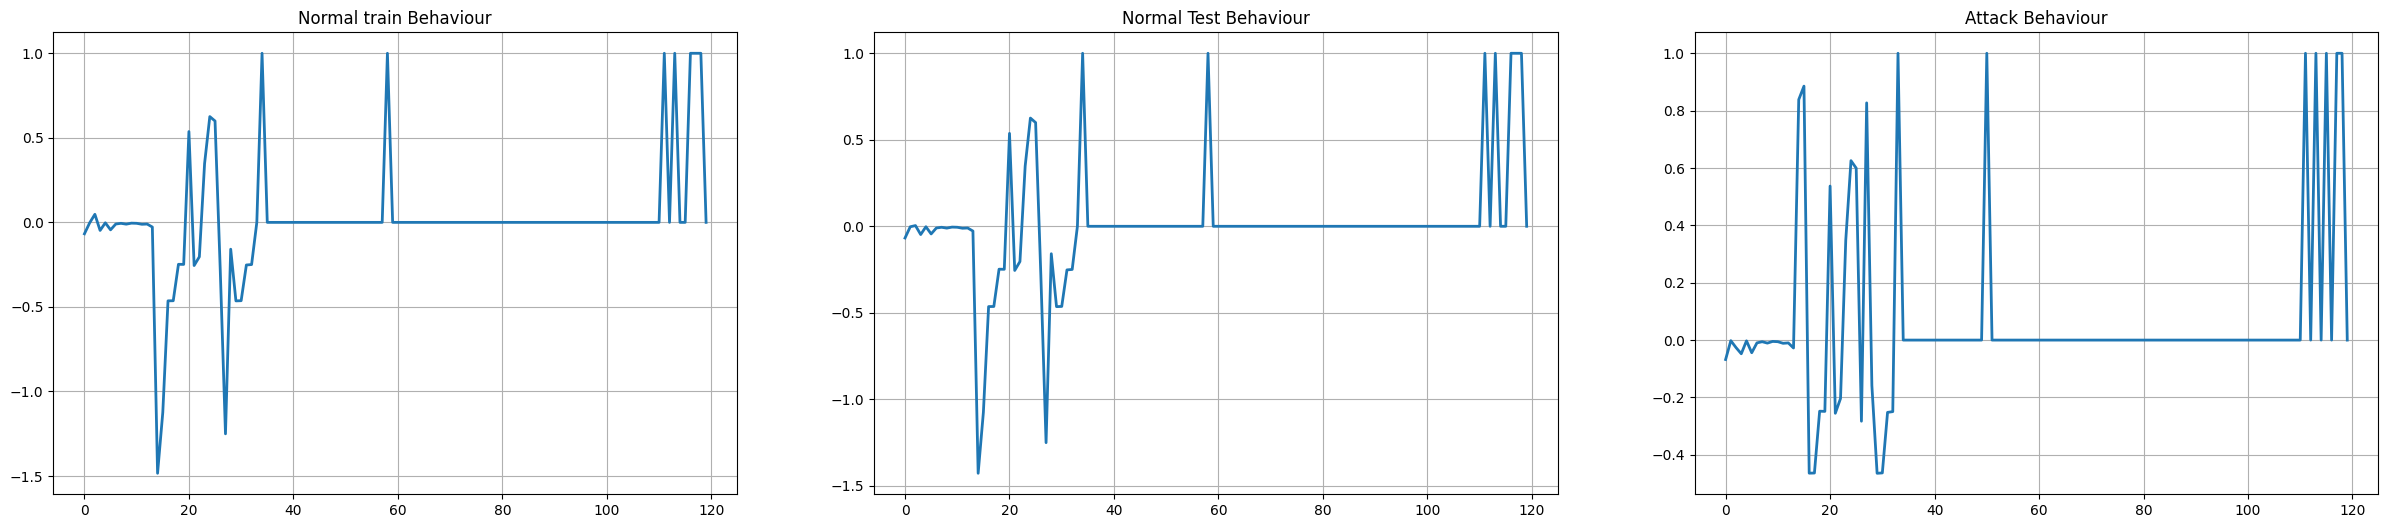

In [28]:
import random

import random
random_train_idx = random.randint(0,len(x_normal_train)) # Random index generator from the train set
random_test_idx = random.randint(0, len(x_normal_test)) # Random index generator from the test set
random_attack_idx = random.randint(0, len(x_attack)) # Random index from generator the attack set

fig, axes = plt.subplots(1,3,figsize=(30,6))
axes =axes.flatten()

axes[0].grid()
axes[0].plot(np.arange(len(x_normal_train[random_idx])), x_normal_train[random_idx],linewidth=2)
axes[0].set_title("Normal train Behaviour")

axes[1].grid()
axes[1].plot(np.arange(len(x_normal_test[random_idx])), x_normal_test[random_idx],linewidth=2)
axes[1].set_title("Normal Test Behaviour")

axes[2].grid()
axes[2].plot(np.arange(len(x_attack[random_idx])), x_attack[random_idx],linewidth=2)
axes[2].set_title("Attack Behaviour")

plt.show()

# __2. Unsupervised Learning Model Development__

## 2.1 Building Model (Drop out from part 6 (Model refinement and optimization))

In [14]:

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras import layers, losses

class AnomalyDetector(Model):
  def __init__(self):
    super(AnomalyDetector, self).__init__()
    self.encoder = tf.keras.Sequential([
      layers.Dense(25,input_dim=x_normal.shape[1], activation="relu"),
      layers.Dropout(0.2), # Dropout layer with 20% dropout rate (from requirement number 6 "refinement")
      layers.Dense(3, activation="relu"),
      ])

    self.decoder = tf.keras.Sequential([
      layers.Dense(25, activation="relu"),
      layers.Dropout(0.2),  # Dropout layer for decoder (from requirement number 6)
      layers.Dense(x_normal.shape[1])])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

learning_rate = 0.001

autoencoder = AnomalyDetector()
optimizer = Adam(learning_rate = learning_rate)
autoencoder.compile(optimizer=optimizer, loss='mean_squared_error')

/home/mojo/anaconda3/envs/tf-gpu/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



## __2.2 Training the autoencoder for 80 epochs__
### Number of epochs was adjusted manually from 50 incrementally to find the best iteration number and batch size set to 512 <text style="color:fuchsia"> (based off requirement from checkpoint number 6: Model Refinement and Optimization )</text>
### We settled on __<text style="color:fuchsia">80 epochs</text>__

In [15]:
num_epochs = 80
history = autoencoder.fit(x_normal_train,x_normal_train,epochs=num_epochs,batch_size=512, validation_data =(x_normal_val, x_normal_val))

Epoch 1/80


I0000 00:00:1721920578.240196  100409 service.cc:146] XLA service 0x7f0c64004850 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1721920578.240252  100409 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce RTX 4070 Laptop GPU, Compute Capability 8.9
2024-07-25 11:16:18.258828: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-07-25 11:16:18.352437: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8907
2024-07-25 11:16:20.411598: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_371', 288 bytes spill stores, 288 bytes spill loads

2024-07-25 11:16:20.627205: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memo

102/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4720

I0000 00:00:1721920582.215473  100409 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
2024-07-25 11:16:23.545275: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_367', 8 bytes spill stores, 8 bytes spill loads

2024-07-25 11:16:23.608307: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_168', 48 bytes spill stores, 48 bytes spill loads

2024-07-25 11:16:23.676223: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_168', 48 bytes spill stores, 48 bytes spill loads

2024-07-25 11:16:24.488412: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to loc

137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.4661

2024-07-25 11:16:27.695048: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_36', 8 bytes spill stores, 8 bytes spill loads



137/137 ━━━━━━━━━━━━━━━━━━━━ 10s 42ms/step - loss: 0.4658 - val_loss: 0.9276
Epoch 2/80
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3543 - val_loss: 0.8232
Epoch 3/80
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2889 - val_loss: 0.6980
Epoch 4/80
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2389 - val_loss: 0.6217
Epoch 5/80
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2311 - val_loss: 0.5285
Epoch 6/80
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1946 - val_loss: 0.4390
Epoch 7/80
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1633 - val_loss: 0.4081
Epoch 8/80
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1525 - val_loss: 0.3933
Epoch 9/80
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1449 - val_loss: 0.3739
Epoch 10/80
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1304 - val_loss: 0.3606
Epoch 11/80
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1389 - val_loss: 0.3430
Epoch 12/80
137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 

## 2.2.1 Visualizing training an Validation loasses

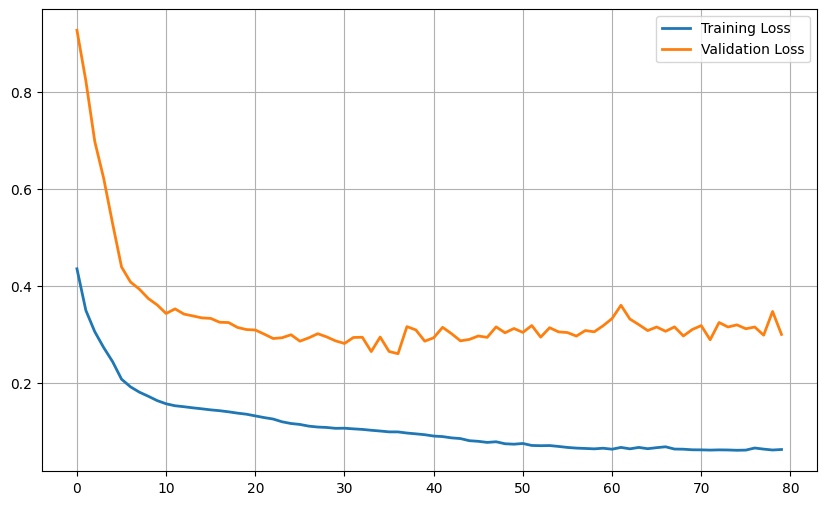

In [16]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,6))
ax.grid()
ax.plot(history.history["loss"], label="Training Loss",linewidth=2)
ax.plot(history.history["val_loss"], label="Validation Loss",linewidth=2)
ax.legend()
plt.show()

## 2.3 
## The first two scores <text style="color: yellow">(RMSE errors)</text> show the <text style="color: lightgreen">"in-sample"(normal train)</text> and <text style="color: lightgreen">"out of sample"(normal test)</text>. These two scores are relatively low and close to each other at around <text style="color: cyan">**0.2**</text> which indicates <text style="color: lightgreen"> **Normal behaviour** </text> . The much higher<text style="color: orange"> **0.53**</text> error occurred from the <text style="color: red">**abnormal data** </text>. The autoencoder is not as capable of encoding data that represents an <text style="color: red">attack behaviour</text>. This higher error indicates an <text style="color: orange">anomaly.</text>

In [17]:
pred = autoencoder.predict(x_normal_test)
score1 = np.sqrt(metrics.mean_squared_error(pred,x_normal_test))
pred = autoencoder.predict(x_normal_train)
score2 = np.sqrt(metrics.mean_squared_error(pred,x_normal_train))
pred = autoencoder.predict(x_attack)
score3 = np.sqrt(metrics.mean_squared_error(pred,x_attack))

print(f"in sample Normal score (RMSE): {score1}")
print(f"out of sample Normal score (RMSE): {score2}")
print(f"attack sample score (RMSE): {score3}")

304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 958us/step
2189/2189 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
12399/12399 ━━━━━━━━━━━━━━━━━━━━ 12s 961us/step
in sample Normal score (RMSE): 0.22856704142344134
out of sample Normal score (RMSE): 0.24542154363593247
attack sample score (RMSE): 0.5160974423876855


## Visualizing the decoding on single examples

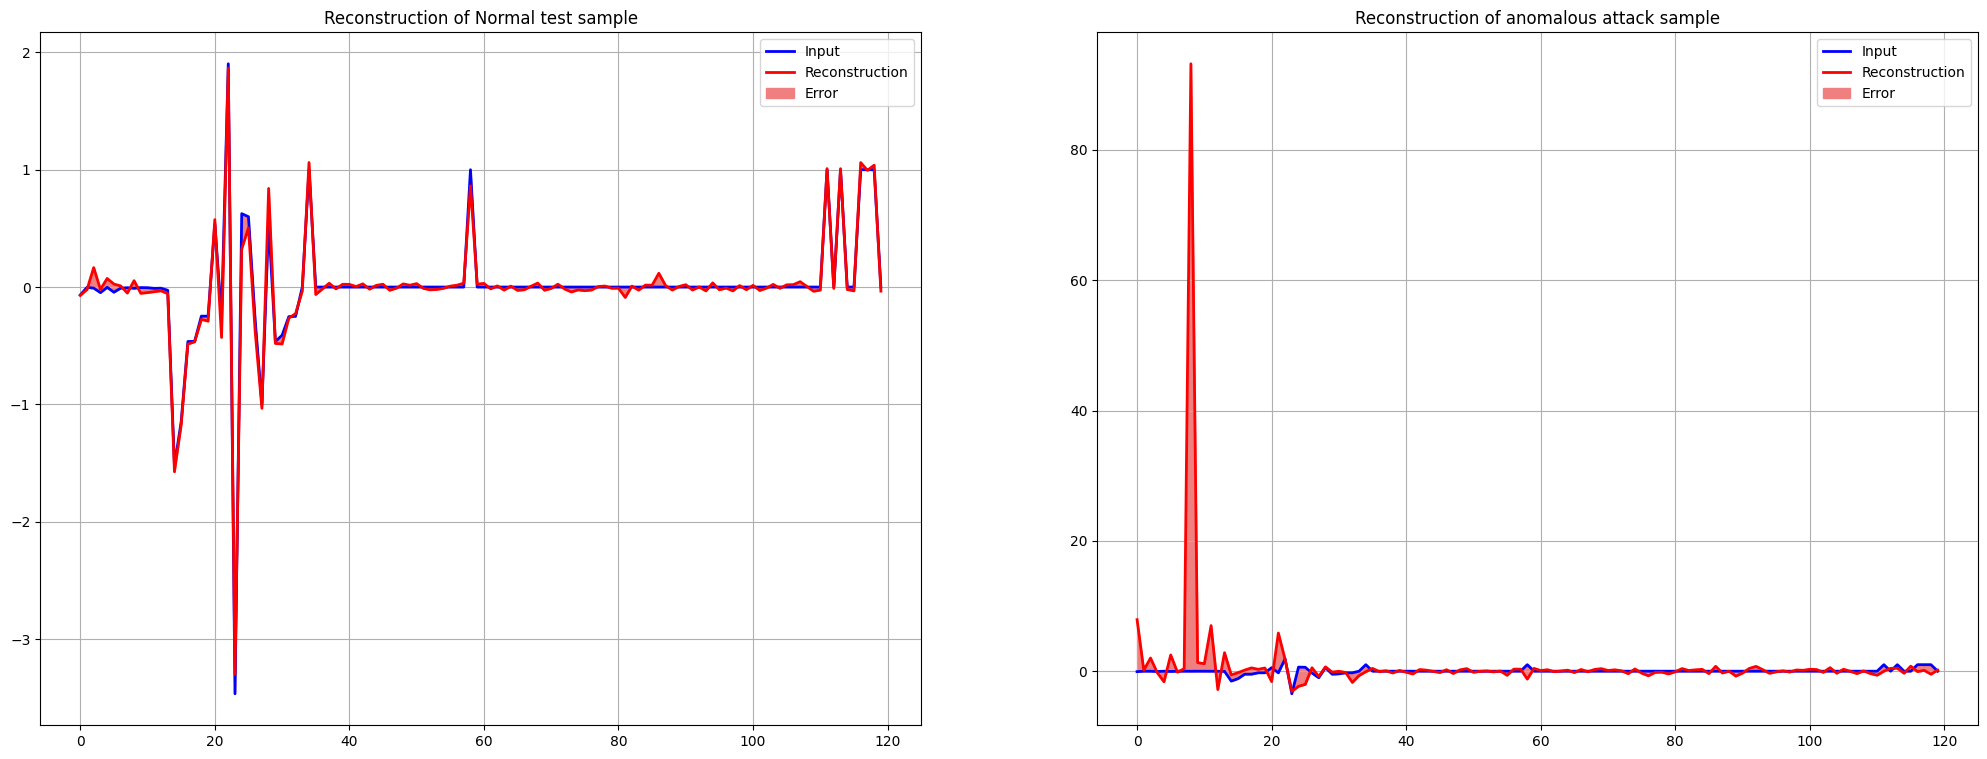

In [59]:
encoded_data = autoencoder.encoder(x_normal_test).numpy()
decoded_data = autoencoder.decoder(encoded_data).numpy()

fig , ax = plt.subplots(1,2,figsize=(25,9))
ax[0].plot(x_normal_test[0], 'b', linewidth=2)
ax[0].plot(decoded_data[0], 'r', linewidth=2)
ax[0].set_title("Reconstruction of Normal test sample")
ax[0].fill_between(np.arange(120), decoded_data[0], x_normal_test[0], color='lightcoral')
ax[0].legend(labels=["Input", "Reconstruction", "Error"])
ax[0].grid()

encoded_data = autoencoder.encoder(x_attack).numpy()
decoded_data = autoencoder.decoder(encoded_data).numpy()

ax[1].plot(x_normal_test[0], 'b',linewidth=2)
ax[1].plot(decoded_data[0], 'r',linewidth=2)
ax[1].fill_between(np.arange(120), decoded_data[0], x_normal_test[0], color='lightcoral')

ax[1].set_title("Reconstruction of anomalous attack sample")
ax[1].legend(labels=["Input", "Reconstruction", "Error"])
ax[1].grid()

plt.show()

## Observing the graph of the  <text style="color: lightgreen"> **Normal behaviour samples** </text> set, notice majority of <text style="color: lightgreen"> **Normal behaviours samples** </text> fall between the  <text style="color: cyan"> **0.0  to 0.15** </text> Loss range

2189/2189 ━━━━━━━━━━━━━━━━━━━━ 2s 926us/step


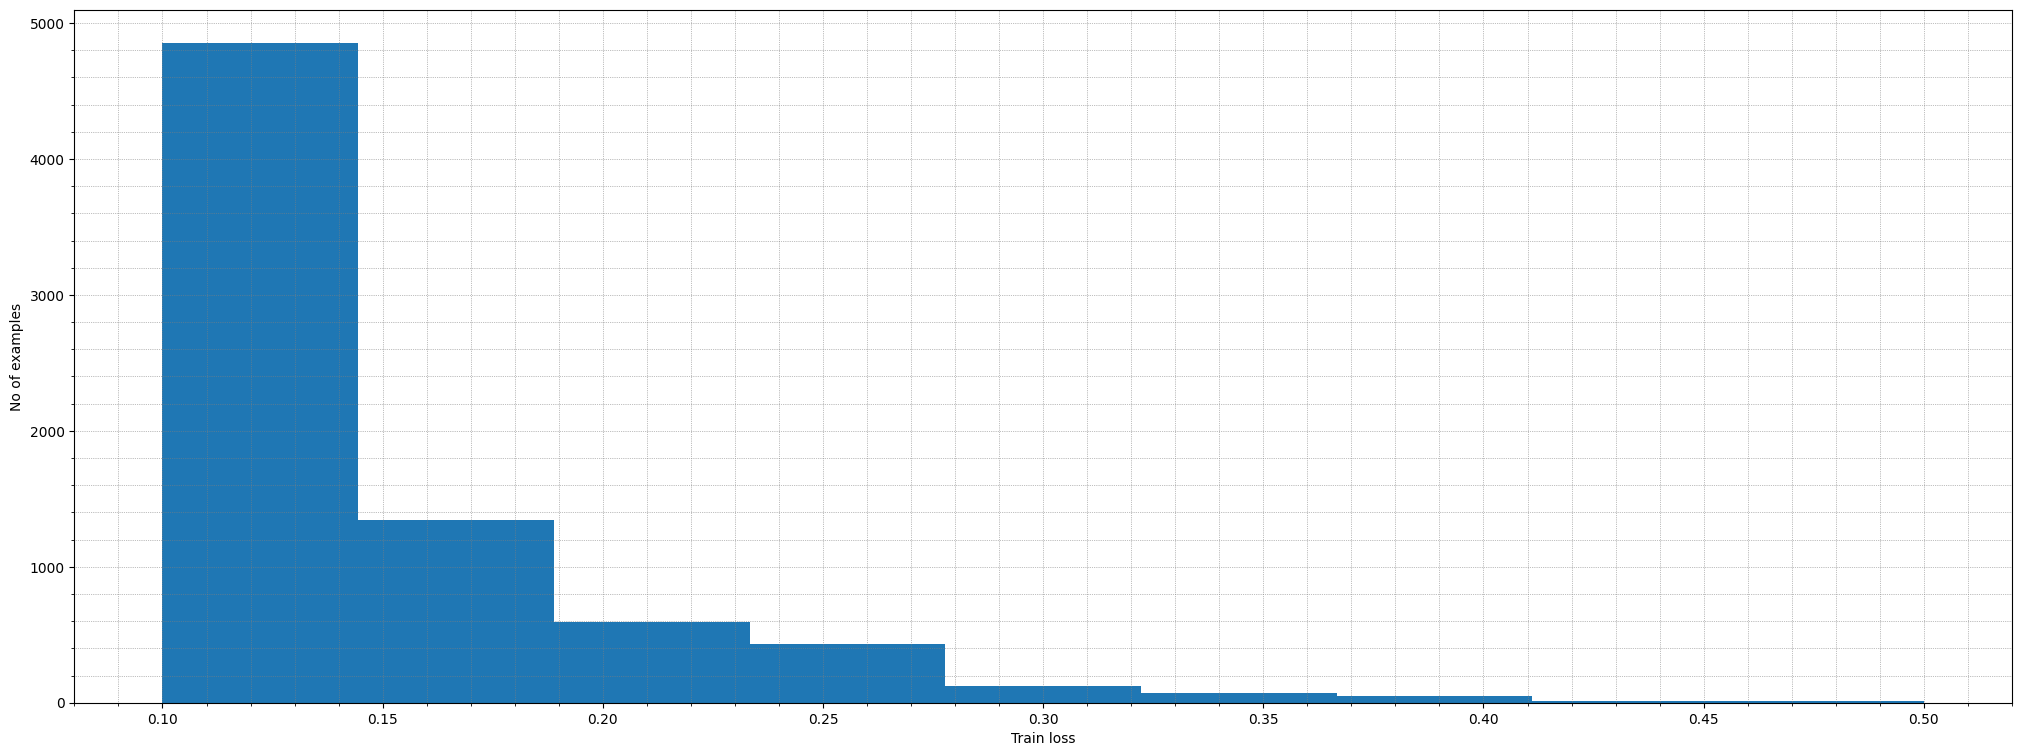

In [19]:
reconstructions = autoencoder.predict(x_normal_train)
train_loss = tf.keras.losses.mae(reconstructions, x_normal_train)

fig, ax = plt.subplots(figsize =(25,9))

bins = np.linspace(0.0,0.5,20)
ax.hist(train_loss[None,:], bins=bins)
ax.minorticks_on()

ax.grid(which='both', linestyle=':', linewidth='0.5', color='gray')
ax.set_xlabel("Train loss")
ax.set_xlim([0.0, 0.1])

ax.set_ylabel("No of examples")
plt.show()

In [20]:
threshold = np.mean(train_loss) + np.std(train_loss)
# threshold = 0.1
print("Threshold: ", threshold)

Threshold:  0.1166226494686427


# 3. Anomaly Detection

## Observing the graph of the  <text style="color: red"> **Attack behaviour samples** </text>, we see that the majority are well above  <text style="color: orange"> **0.1 loss** </text>. with some samples above <text style="color: orange">**0.4** loss</text>. this would be <text style="color: orange">Anomalous behaviour<text style="color: orange">

12399/12399 ━━━━━━━━━━━━━━━━━━━━ 11s 913us/step


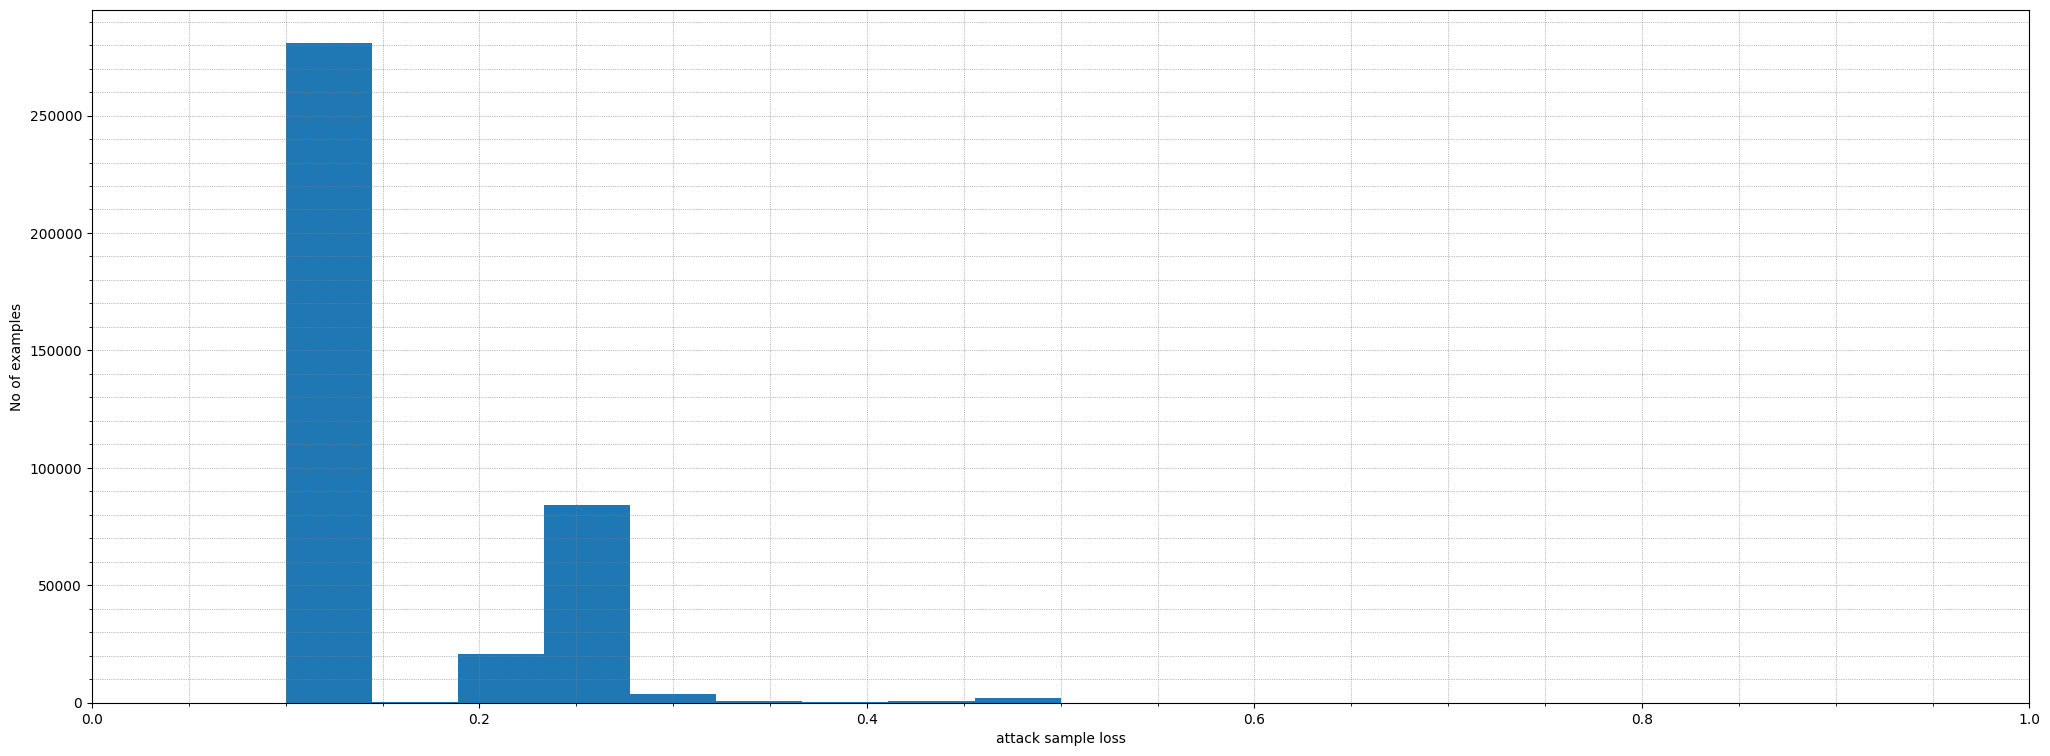

In [21]:
reconstructions = autoencoder.predict(x_attack)
test_loss = tf.keras.losses.mae(reconstructions, x_attack)
fig, ax = plt.subplots(figsize =(25,9))

ax.hist(test_loss[None, :], bins=bins)
ax.minorticks_on()

ax.grid(which='both', linestyle=':', linewidth='0.5', color='gray')

ax.set_xlabel("attack sample loss")
ax.set_xlim([0.0, 1.0])

ax.set_ylabel("No of examples")
plt.show()

# 4 Actionable Recommendations

## 4.1 Recommendation: Investigate unusually long connection durations. This could indicate attempts to establish prolonged unauthorized access.


In [22]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error

# Calculate reconstruction errors
reconstructions_attack = autoencoder.predict(x_attack)
reconstructions_normal = autoencoder.predict(x_normal_test)

# Calculate the reconstruction error for each feature
errors_attack = np.abs(x_attack - reconstructions_attack)
errors_normal = np.abs(x_normal_test - reconstructions_normal)

# Get mean errors per feature
mean_errors_attack = np.mean(errors_attack, axis=0)
mean_errors_normal = np.mean(errors_normal, axis=0)

# column names
feature_names = df.columns  

# storing the calculated parameters in a dataframe
error_df = pd.DataFrame({
    'Feature': feature_names,
    'Mean Error Attack': mean_errors_attack,
    'Mean Error Normal': mean_errors_normal
})

# Sort by mean error for attack in desceding order
error_df.sort_values(by='Mean Error Attack', ascending=False, inplace=True)

# top_features = error_df.head(10)['Feature'].values
print("Top contributing features to anomalies:")

pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_rows', None)  # Show all rows


error_df.head(10)

12399/12399 ━━━━━━━━━━━━━━━━━━━━ 11s 898us/step
304/304 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Top contributing features to anomalies:


Feature  Mean Error Attack  Mean Error Normal
14                        count           1.895870           0.041689
27  dst_host_same_src_port_rate           1.537348           0.230335
15                    srv_count           1.429383           0.045711
35            protocol_type-udp           0.737271           0.144824
25       dst_host_same_srv_rate           0.720839           0.234211
50                service-ecr_i           0.713832           0.024477
33           protocol_type-icmp           0.703372           0.040968
24           dst_host_srv_count           0.675538           0.335727
20                same_srv_rate           0.651182           0.069610
16                  serror_rate           0.601516           0.013302

# 5 Evaluation and Visualization 

## 5.1 Precision, recall, F1-score

In [23]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score

reconstructions_normal = autoencoder.predict(x_normal_test)
reconstructions_attack = autoencoder.predict(x_attack)

# calculating the losses
loss_normal = tf.keras.losses.mae(reconstructions_normal, x_normal_test).numpy() 
loss_attack = tf.keras.losses.mae(reconstructions_attack, x_attack).numpy()

print("Threshold: ", threshold)

# predictions based on the threshold
predictions_normal = loss_normal < threshold
predictions_attack = loss_attack > threshold

# Combine predictions and the true labels
true_labels = np.concatenate([np.zeros(len(loss_normal)), np.ones(len(loss_attack))])
predictions = np.concatenate([predictions_normal, predictions_attack])

# finding accuracy, precision and recall 
accuracy = accuracy_score(true_labels, predictions)
precision = precision_score(true_labels, predictions)
recall = recall_score(true_labels, predictions)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")


304/304 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
12399/12399 ━━━━━━━━━━━━━━━━━━━━ 12s 940us/step
Threshold:  0.1166226494686427
Accuracy: 0.9481734244263429
Precision: 0.9769689982910844
Recall: 0.9697638017557966


## 5.2 ROC - curve
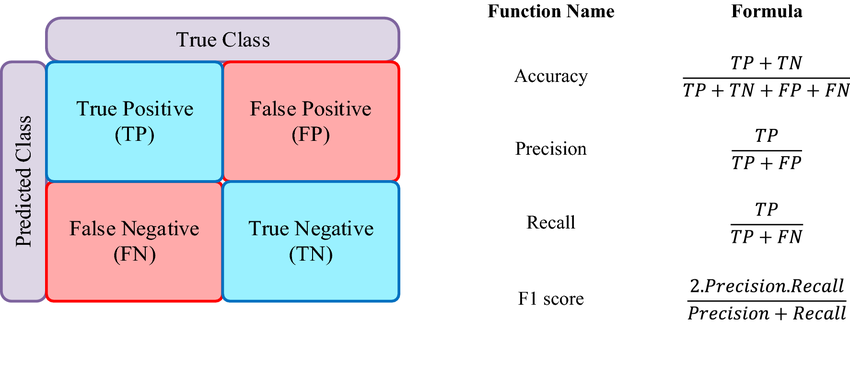
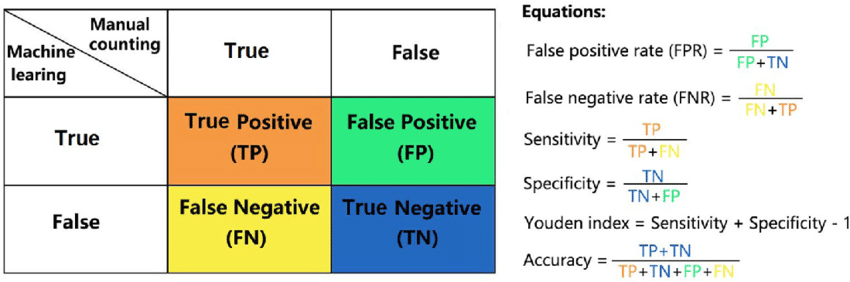

12399/12399 ━━━━━━━━━━━━━━━━━━━━ 12s 992us/step
304/304 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


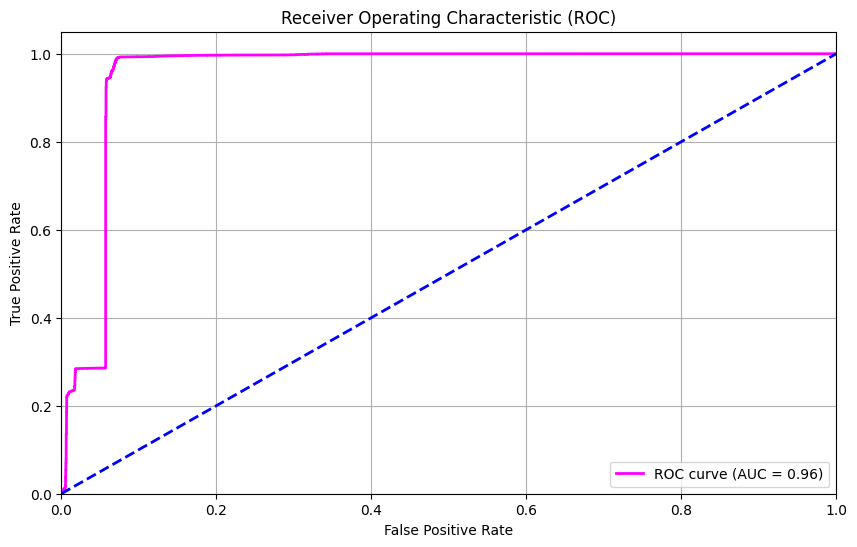

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc



# Calculate reconstruction errors on attack and normal
reconstructions_attack = autoencoder.predict(x_attack)
reconstructions_normal = autoencoder.predict(x_normal_test)

# Flatten the arrays to compute errors
errors_attack = np.mean(np.abs(x_attack - reconstructions_attack), axis=1) 
errors_normal = np.mean(np.abs(x_normal_test - reconstructions_normal), axis=1)

# Create labels
y_true = np.concatenate([np.ones(len(errors_attack)), np.zeros(len(errors_normal))])
y_scores = np.concatenate([errors_attack, errors_normal])

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_true, y_scores)
roc_auc = auc(fpr, tpr) # probability that a randomly chosen positive instance is ranked higher than a randomly chosen negative instance

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='fuchsia', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.grid()
plt.show()


### The ROC curve shows the trade-off between <text style="color: skyblue">__sensitivity (or TPR) and specificity__</text>
### The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.


## References
1. https://www.displayr.com/what-is-a-roc-curve-how-to-interpret-it/#:~:text=The%20ROC%20curve%20shows%20the,diagonal%20(FPR%20%3D%20TPR).
2. https://www.researchgate.net/figure/Confusion-matrix-and-performance-equations-The-confusion-matrix-included-four_fig1_340034692
3. https://kdd.ics.uci.edu/databases/kddcup99/kddcup99.
4. https://towardsdatascience.com/evaluating-categorical-models-ii-sensitivity-and-specificity-e181e573cff8#:~:text=Sensitivity%20is%20the%20metric%20that,apply%20to%20any%20categorical%20model.